In [ ]:
!pip install pandas seaborn scikit-learn
import pandas as pd

In [ ]:
!pip install ipywidgets plotly

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

# 1) Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)

In [ ]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df_base = df.copy()

In [ ]:
df_base = df_base.drop('Person ID', axis=1)
df_base = df_base.drop('Gender', axis=1)
df_base = df_base.drop('Occupation', axis=1)
df_base = df_base.drop('BMI Category', axis=1)
df_base = df_base.drop('Sleep Disorder', axis=1)
df_base = df_base.drop('Blood Pressure', axis=1)

In [ ]:
df_base

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,27,6.1,6,42,6,77,4200
1,28,6.2,6,60,8,75,10000
2,28,6.2,6,60,8,75,10000
3,28,5.9,4,30,8,85,3000
4,28,5.9,4,30,8,85,3000
...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000
370,59,8.0,9,75,3,68,7000
371,59,8.1,9,75,3,68,7000
372,59,8.1,9,75,3,68,7000


In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      374 non-null    int64  
 1   Sleep Duration           374 non-null    float64
 2   Quality of Sleep         374 non-null    int64  
 3   Physical Activity Level  374 non-null    int64  
 4   Stress Level             374 non-null    int64  
 5   Heart Rate               374 non-null    int64  
 6   Daily Steps              374 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 20.6 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
category_columns: list[str] = df.select_dtypes(include=['object']).columns # собираем колонки помеченные как objects

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

In [ ]:
df

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
0,0.000000,0.00000,0.111111,0.4,0.20,0.6,0.571429,0.171429,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.002681,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
2,0.005362,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
3,0.008043,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
4,0.010724,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.989276,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
370,0.991957,1.00000,0.814815,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
371,0.994638,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
372,0.997319,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True


# 2) Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат

In [ ]:
X = df.to_numpy()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display, clear_output

def interactive_kmeans_visualization_3d(X, max_clusters=10, max_iterations=50):
    # Преобразуем DataFrame в numpy
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Снижаем размерность до 3 компонент через PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    def plot_kmeans_iteration(X_pca, centroids, labels=None, step=0):
        clear_output(wait=True)
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        if labels is not None:
            ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       c=labels, cmap='viridis', s=30, alpha=0.6)
        else:
            ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                       s=30, alpha=0.6)

        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
                   c='red', marker='x', s=100, label='Centroids')

        ax.set_title(f'K-means Iteration {step}', fontsize=14)
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        ax.legend()
        plt.show()

    def k_means_interactive(X_pca, k, max_iters):
        np.random.seed(42)
        centroids = X_pca[np.random.choice(X_pca.shape[0], k, replace=False)]
        for step in range(max_iters):
            distances = np.linalg.norm(X_pca[:, np.newaxis] - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            plot_kmeans_iteration(X_pca, centroids, labels, step)
            new_centroids = np.array([X_pca[labels == i].mean(axis=0) for i in range(k)])
            if np.allclose(centroids, new_centroids, atol=1e-6):
                break
            centroids = new_centroids

    def run_kmeans(k, max_iters):
        k_means_interactive(X_pca, k, max_iters)

    # Ползунки
    k_slider = widgets.IntSlider(value=3, min=2, max=max_clusters, step=1, description='Clusters (k):')
    iter_slider = widgets.IntSlider(value=10, min=1, max=max_iterations, step=1, description='Max Iterations:')

    interactive_plot = widgets.interactive(run_kmeans, k=k_slider, max_iters=iter_slider)
    display(interactive_plot)

In [ ]:
%matplotlib inline

interactive_kmeans_visualization_3d(X)

interactive(children=(IntSlider(value=3, description='Clusters (k):', max=10, min=2), IntSlider(value=10, desc…

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Обучаем K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_base.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean()

cluster_means.round(2)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
cluster,,,,,,,
0,40.02,7.19,7.64,63.20,4.69,68.84,7030.34
1,53.95,7.10,7.52,82.38,5.49,71.57,8415.38
2,32.33,7.50,7.08,67.29,5.83,71.12,7591.67
3,43.38,6.43,6.00,43.85,7.02,73.13,5770.21
4,49.97,8.24,8.84,34.74,3.16,65.00,5000.00
5,31.52,6.06,5.81,32.26,7.97,73.77,5080.65


In [ ]:
clusters

array([-1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  1,  0,  1,  1,  1,  1, -1,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  2,
        0,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
       -1,  2,  0,  2,  2,  0,  2,  2,  0,  2,  2,  2,  2,  2,  2, -1,  2,
       -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1, -1, -1,
        3,  4,  4,  4,  4,  4,  4, -1, -1,  3,  3,  3,  3,  5,  5,  5,  5,
        5, -1, -1, -1, -1, -1, -1,  6,  3,  6,  3,  6,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3, -1,  6,  3,  6,  6,  3,  6,  6,  3,  6,  6,
        3,  6,  3,  6,  3,  6,  3,  3, -1, -1,  6, -1, -1, -1, -1,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6, -1, -1,  7,  7,  7, -1, -1, -1,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  7,  7,  7,  7,  7,  7, -1, -1,  9,
        8,  9,  8,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 10, 10, -1,
       -1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, -1, -1,  9,
        8,  8,  8,  9,  8

# 3) Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат

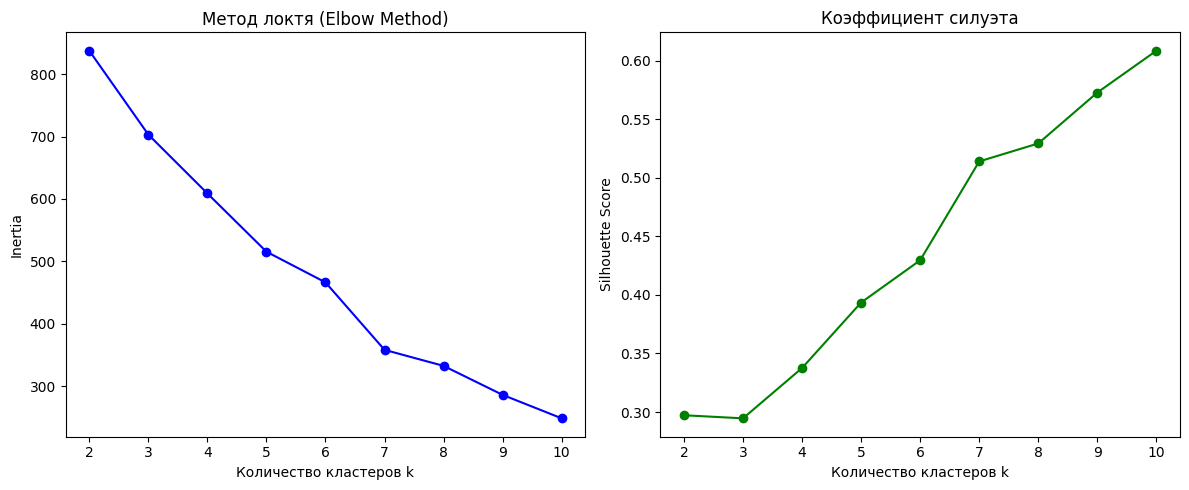

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)  # внутренняя метрика K-Means
    silhouettes.append(silhouette_score(X, kmeans.labels_))  # внешняя метрика

# Визуализация "метода локтя"
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя (Elbow Method)')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()

# 4) Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат

In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # параметры можно подобрать
clusters = dbscan.fit_predict(X)

# Копируем исходный DataFrame
df_cluster = df_base.copy()

# Добавляем колонку с номерами кластеров
df_cluster['cluster'] = clusters

# Смотрим, какие кластеры сформировались
print("Количество найденных кластеров (без -1):", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Количество выбросов (cluster = -1):", np.sum(clusters == -1))

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean().round(2)

cluster_means

Количество найденных кластеров (без -1): 15
Количество выбросов (cluster = -1): 65


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
cluster,,,,,,,
-1,38.88,6.99,6.85,56.85,5.68,74.37,6176.92
0,30.48,7.74,7.00,75.00,6.00,70.00,8000.00
1,29.00,6.04,6.00,30.00,8.00,70.00,8000.00
2,32.32,6.06,6.00,30.00,8.00,72.00,5000.00
3,37.08,7.16,8.00,60.00,4.00,68.00,7000.00
4,35.00,7.27,8.00,60.00,4.00,65.00,5000.00
5,36.00,7.16,8.00,60.00,4.00,68.00,7000.00
6,38.33,7.24,8.00,60.00,5.00,68.00,8000.00
7,41.24,7.74,8.00,90.00,5.00,69.76,8000.00


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def interactive_dbscan_visualization_pca2d(X):
    # Преобразуем DataFrame в numpy
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Масштабируем данные (DBSCAN чувствителен к масштабу!)
    X_scaled = StandardScaler().fit_transform(X)

    # Уменьшаем размерность до 2D через PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    def plot_dbscan(X_pca, labels, core_samples_mask, eps, min_samples, metric):
        clear_output(wait=True)
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        plt.figure(figsize=(8, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Черный цвет для шума
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X_pca[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=12)

            xy = X_pca[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        plt.title(f'DBSCAN (PCA 2D): eps={eps}, min_samples={min_samples}, metric={metric}')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.grid(True, alpha=0.3)
        plt.show()

    def run_dbscan(eps, min_samples, metric):
        # Обучение DBSCAN на данных после PCA
        db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
        db.fit(X_pca)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        plot_dbscan(X_pca, labels, core_samples_mask, eps, min_samples, metric)

    # Виджеты для параметров
    eps_slider = widgets.FloatSlider(value=0.5, min=0.1, max=2.0, step=0.1, description='eps:')
    min_samples_slider = widgets.IntSlider(value=5, min=1, max=30, step=1, description='min_samples:')
    metric_dropdown = widgets.Dropdown(
        options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
        value='euclidean', description='metric:'
    )

    ui = widgets.VBox([eps_slider, min_samples_slider, metric_dropdown])
    out = widgets.interactive_output(run_dbscan, {
        'eps': eps_slider,
        'min_samples': min_samples_slider,
        'metric': metric_dropdown
    })
    display(ui, out)

In [ ]:
interactive_dbscan_visualization_pca2d(X)

Output()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Добавляем кластеры в DataFrame
df_cluster = df_base.copy()
df_cluster['cluster'] = clusters

# Убираем выбросы (-1) перед метриками
mask = clusters != -1
X_valid = X[mask]
labels_valid = clusters[mask]

if len(set(labels_valid)) > 1:  # нужно хотя бы 2 кластера для оценки
    sil = silhouette_score(X_valid, labels_valid)
    dbi = davies_bouldin_score(X_valid, labels_valid)
    chi = calinski_harabasz_score(X_valid, labels_valid)

    print(f"Silhouette Score: {sil:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
    print(f"Calinski-Harabasz Index: {chi:.3f}")
else:
    print("Недостаточно кластеров для расчёта метрик.")

Silhouette Score: 0.938
Davies-Bouldin Index: 0.080
Calinski-Harabasz Index: 11002.140
